In [1]:
import pandas as pd

# Specify the file path of the CSV file
file_path = 'Data_2324.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',100)

In [2]:
# Display the first few rows of the DataFrame to verify that the data is loaded correctly
df.head()

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,1,N,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,1/10/2019,1/10/2019,31.0,1,1,Ethereum,5.099990e+05,0,0.49
1,2,N,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,7/9/2018,12/10/2018,20.0,1,1,XAYA,2.250000e+08,1,0.41
2,3,N,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,1/7/2019,30/06/2020,10.0,1,1,Stellar,5.000000e+09,1,0.40
3,4,Y,International Real Estate Crowdfunding Platform,1,4.3,NaN,Netherlands,1/10/2019,15/12/2019,27.0,1,1,Separate blockchain,1.250000e+08,1,0.13
4,5,N,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5.000000e+09,1,0.50


In [3]:
df.columns

Index(['ID', 'success', 'brandSlogan', 'hasVideo', 'rating', 'priceUSD',
       'countryRegion', 'startDate', 'endDate', 'teamSize', 'hasGithub',
       'hasReddit', 'platform', 'coinNum', 'minInvestment',
       'distributedPercentage'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the success column
df['success_encoded'] = label_encoder.fit_transform(df['success'])

# Drop the original success column
df.drop(columns=['success'], inplace=True)

# Display the DataFrame with the encoded success column
df


,ID,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,success_encoded
0,1,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,1/10/2019,1/10/2019,31.0,1,1,Ethereum,5.099990e+05,0,0.49,0
1,2,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,7/9/2018,12/10/2018,20.0,1,1,XAYA,2.250000e+08,1,0.41,0
2,3,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,1/7/2019,30/06/2020,10.0,1,1,Stellar,5.000000e+09,1,0.40,0
3,4,International Real Estate Crowdfunding Platform,1,4.3,NaN,Netherlands,1/10/2019,15/12/2019,27.0,1,1,Separate blockchain,1.250000e+08,1,0.13,1
4,5,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5.000000e+09,1,0.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,2763,Helping the adoption of cryptocurrency,0,1.0,1.00,USA,2/12/2017,31/12/2017,NaN,0,0,Ethereum,8.000000e+08,0,0.80,0
2763,2764,The Adult Industry Crypto,0,1.0,0.30,Indonesia,15/09/2017,31/10/2017,NaN,0,0,Ethereum,1.000000e+08,0,0.20,0
2764,2765,"Fast, cheap, scalable token transfers",1,2.0,0.67,Germany,18/10/2017,1/11/2017,NaN,1,1,Ethereum,5.000000e+07,0,0.50,1
2765,2766,CarVDB Blockchain Platform,0,1.8,0.33,Bulgaria,1/4/2018,11/6/2018,NaN,0,0,Ethereum,4.997856e+07,1,0.50,0


In [5]:
na_counts = df.isna().sum()
na_counts

ID                         0
brandSlogan                0
hasVideo                   0
rating                     0
priceUSD                 180
countryRegion             71
startDate                  0
endDate                    0
teamSize                 154
hasGithub                  0
hasReddit                  0
platform                   0
coinNum                    0
minInvestment              0
distributedPercentage      0
success_encoded            0
dtype: int64

In [6]:
# Remove rows with 3 or more NA columns
df = df.dropna()
df.isna().sum()

ID                       0
brandSlogan              0
hasVideo                 0
rating                   0
priceUSD                 0
countryRegion            0
startDate                0
endDate                  0
teamSize                 0
hasGithub                0
hasReddit                0
platform                 0
coinNum                  0
minInvestment            0
distributedPercentage    0
success_encoded          0
dtype: int64

In [7]:
import pandas as pd

# Convert startDate and endDate columns to datetime format
df['startDate'] = pd.to_datetime(df['startDate'], errors='coerce', dayfirst=True)
df['endDate'] = pd.to_datetime(df['endDate'], errors='coerce', dayfirst=True)

df['startDate']

/tmp/ipykernel_33/2196784423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startDate'] = pd.to_datetime(df['startDate'], errors='coerce', dayfirst=True)
/tmp/ipykernel_33/2196784423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['endDate'] = pd.to_datetime(df['endDate'], errors='coerce', dayfirst=True)


0      2019-10-01
1      2018-09-07
2      2019-07-01
4      2019-07-28
5      2020-02-25
          ...    
2737   2018-03-08
2738   2017-08-17
2742   2018-02-24
2746   2017-10-07
2752   2017-07-10
Name: startDate, Length: 2392, dtype: datetime64[ns]

In [8]:
#Filter out rows with invalid dates
df= df[df['endDate'] > df['startDate']]

# Reset the index
df.reset_index(drop=True, inplace=True)
from dateutil.relativedelta import relativedelta

# Calculate the difference in months between startDate and endDate
df['num_months'] = df.apply(lambda row: relativedelta(row['endDate'], row['startDate']).months, axis=1)



In [9]:
df.drop(columns=['endDate', 'startDate'], inplace=True)
df

,ID,brandSlogan,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,success_encoded,num_months
0,2,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,20.0,1,1,XAYA,2.250000e+08,1,0.41,0,1
1,3,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,10.0,1,1,Stellar,5.000000e+09,1,0.40,0,11
2,5,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,14.0,1,1,Ethereum,5.000000e+09,1,0.50,0,4
3,6,Blockchain-based Bank Full Eco System WorldWide,1,4.7,0.10,UK,43.0,1,1,Ethereum,5.000000e+08,1,0.50,0,4
4,7,The First Blockchain Based Platform in Global,1,4.1,0.02,Singapore,20.0,1,1,Ethereum,2.500000e+09,1,0.25,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2738,Decentralised Global Index Trading Platform,0,1.3,0.05,Poland,1.0,0,0,Ethereum,7.000000e+08,0,0.70,0,4
2346,2739,The best way to say thank you,0,1.3,1.00,Russia,4.0,0,0,Waves,3.500000e+07,0,0.50,0,1
2347,2743,HorseCoin.,0,1.3,0.04,Belgium,6.0,1,1,Ethereum,2.000000e+07,0,0.80,0,4
2348,2747,A Cryptocurrency Value Chain,0,1.2,1.00,Singapore,1.0,0,0,Ethereum,2.000000e+07,0,0.30,0,0


In [10]:
import numpy as np
df['platform'] = df['platform'].str.replace(" ", "").str.strip()
df['platform'] = df['platform'].str.lower()
df['platform'] = df['platform'].replace('ethererum', 'ethereum')

np.sort(df.platform.unique())

array(['', 'acclaim', 'achain', 'aion', 'akroma', 'apolloblockchain',
       'ardor', 'bitcoin', 'bitforex', 'bitshares', 'blockchain',
       'chainrepublikblockchain', 'coffe', 'coincart', 'counterparty',
       'cryptonight', 'cryptonote-basedblockchain', 'dag',
       'decoinblockchain', 'dpos', 'enlteplatform', 'entry', 'eos',
       'erc20', 'eth', 'ethereum', 'ethereum,waves', 'etherum', 'fiber',
       'filecoinnetwork', 'gochain', 'graphene', 'hard-forkoflitecoin',
       'hyperledger', 'icon', 'infinityblockchain', 'ioliteblockchain',
       'iovblockchain', 'irongeekchain', 'isl-blockchain', 'keccak',
       'komodo', 'lisk', 'litecoin', 'mahraplatform', 'monero',
       'multichain', 'native', 'neblio', 'nem', 'neo', 'neurochain',
       'newblockchain', 'nxt', 'pivx', 'pos', 'pos,pow', 'pow/pos', 'qrc',
       'qtum', 'ripemd160', 'rsk', 'scrypt', 'separateblockchain',
       'slatechain', 'smartx', 'st20', 'startengine', 'steem', 'stellar',
       'stellarprotocol', 'stra

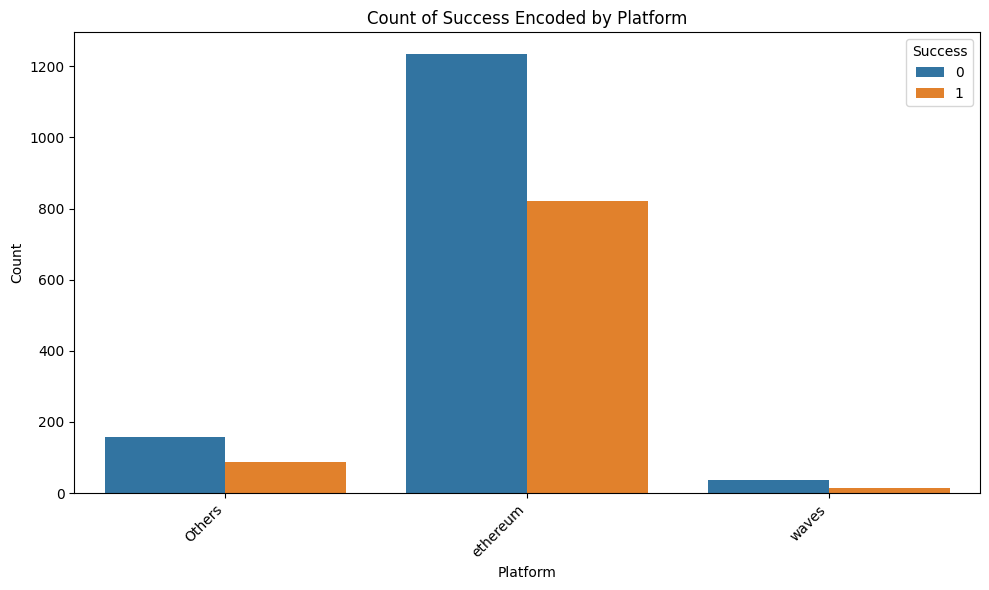

platform
ethereum    2055
Others       244
waves         51
Name: count, dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find platform values with counts less than 6
platform_counts = df['platform'].value_counts()
other_platforms = platform_counts[platform_counts < 50].index.tolist()

# Replace these platform values with 'Others'
df.loc[df['platform'].isin(other_platforms), 'platform'] = 'Others'

# Plot the count of success_encoded by platform
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='platform', hue='success_encoded')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Count of Success Encoded by Platform')
plt.legend(title='Success', labels=['0', '1'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df.platform.value_counts()

In [12]:
import numpy as np

# Extract the 'coinNum' column
coinNum_column = df['coinNum']

# Apply logarithmic scaling
coinNum_log_scaled = np.log(coinNum_column)

# Replace any negative or zero values with NaN (optional)
coinNum_log_scaled[coinNum_log_scaled <= 0] = np.nan

# Replace NaN values with the mean of the column (optional)
coinNum_log_scaled.fillna(coinNum_log_scaled.mean(), inplace=True)

# Add the scaled column back to the DataFrame
df['coinNum_log_scaled'] = coinNum_log_scaled

df.drop(columns=['coinNum'], inplace=True)
# Display the DataFrame with the scaled values
df

,ID,brandSlogan,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,minInvestment,distributedPercentage,success_encoded,num_months,coinNum_log_scaled
0,2,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,20.0,1,1,Others,1,0.41,0,1,19.231611
1,3,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,10.0,1,1,Others,1,0.40,0,11,22.332704
2,5,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,14.0,1,1,ethereum,1,0.50,0,4,22.332704
3,6,Blockchain-based Bank Full Eco System WorldWide,1,4.7,0.10,UK,43.0,1,1,ethereum,1,0.50,0,4,20.030119
4,7,The First Blockchain Based Platform in Global,1,4.1,0.02,Singapore,20.0,1,1,ethereum,1,0.25,1,1,21.639557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2738,Decentralised Global Index Trading Platform,0,1.3,0.05,Poland,1.0,0,0,ethereum,0,0.70,0,4,20.366591
2346,2739,The best way to say thank you,0,1.3,1.00,Russia,4.0,0,0,waves,0,0.50,0,1,17.370859
2347,2743,HorseCoin.,0,1.3,0.04,Belgium,6.0,1,1,ethereum,0,0.80,0,4,16.811243
2348,2747,A Cryptocurrency Value Chain,0,1.2,1.00,Singapore,1.0,0,0,ethereum,0,0.30,0,0,16.811243


In [13]:
#remove outlier
df= df[df['priceUSD'] <10000]
df['priceUSD'].describe()

count    2349.000000
mean        3.483244
std        38.825093
min         0.000000
25%         0.040000
50%         0.120000
75%         0.500000
max      1000.000000
Name: priceUSD, dtype: float64

In [14]:
df = df[(df['distributedPercentage'] <= 1) & (df['distributedPercentage'] >= 0)]
df

,ID,brandSlogan,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,minInvestment,distributedPercentage,success_encoded,num_months,coinNum_log_scaled
0,2,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,20.0,1,1,Others,1,0.41,0,1,19.231611
1,3,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,10.0,1,1,Others,1,0.40,0,11,22.332704
2,5,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,14.0,1,1,ethereum,1,0.50,0,4,22.332704
3,6,Blockchain-based Bank Full Eco System WorldWide,1,4.7,0.10,UK,43.0,1,1,ethereum,1,0.50,0,4,20.030119
4,7,The First Blockchain Based Platform in Global,1,4.1,0.02,Singapore,20.0,1,1,ethereum,1,0.25,1,1,21.639557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2738,Decentralised Global Index Trading Platform,0,1.3,0.05,Poland,1.0,0,0,ethereum,0,0.70,0,4,20.366591
2346,2739,The best way to say thank you,0,1.3,1.00,Russia,4.0,0,0,waves,0,0.50,0,1,17.370859
2347,2743,HorseCoin.,0,1.3,0.04,Belgium,6.0,1,1,ethereum,0,0.80,0,4,16.811243
2348,2747,A Cryptocurrency Value Chain,0,1.2,1.00,Singapore,1.0,0,0,ethereum,0,0.30,0,0,16.811243


In [15]:
np.sort(df.countryRegion.unique())

array(['Afghanistan', 'Andorra', 'Anguilla', 'Argentina', 'Australia',
       'Austria', 'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', 'Croatia', 'Curacao', 'Curaçao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Estonia', 'Finland', 'France', 'French Polynesia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece',
       'Guinea-Bissau', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Kuwait', 'Kyrgyzstan', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macedonia', 'Malaysia', 'Malta', 'Marshall Islands',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'México',
       'Netherlands', 'New Caledonia', 'New Zealand', 

In [16]:
df['countryRegion'] = df['countryRegion'].str.lower()
df['countryRegion'] = df['countryRegion'].str.replace(" ", "").str.strip()
np.sort(df.countryRegion.unique())

array(['afghanistan', 'andorra', 'anguilla', 'argentina', 'australia',
       'austria', 'bahamas', 'barbados', 'belarus', 'belgium', 'belize',
       'bermuda', 'bosniaandherzegovina', 'brazil',
       'britishvirginislands', 'bulgaria', 'cambodia', 'canada',
       'caymanislands', 'chile', 'china', 'colombia', 'congo',
       'costarica', 'croatia', 'curacao', 'curaçao', 'cyprus',
       'czechrepublic', 'denmark', 'dominicanrepublic', 'ecuador',
       'egypt', 'estonia', 'finland', 'france', 'frenchpolynesia',
       'georgia', 'germany', 'ghana', 'gibraltar', 'greece',
       'guinea-bissau', 'hungary', 'iceland', 'india', 'indonesia',
       'ireland', 'isleofman', 'israel', 'italy', 'japan', 'kazakhstan',
       'kuwait', 'kyrgyzstan', 'latvia', 'liechtenstein', 'lithuania',
       'luxembourg', 'macedonia', 'malaysia', 'malta', 'marshallislands',
       'mauritius', 'mexico', 'mongolia', 'montenegro', 'méxico',
       'netherlands', 'newcaledonia', 'newzealand', 'nigeria',
   

In [17]:
# Replace 'curaçao' with 'curacao'
df['countryRegion'] = df['countryRegion'].replace('curaçao', 'curacao')
# Replace 'curaçao' with 'curacao'
df['countryRegion'] = df['countryRegion'].replace('méxico', 'mexico')
np.sort(df.countryRegion.unique())

array(['afghanistan', 'andorra', 'anguilla', 'argentina', 'australia',
       'austria', 'bahamas', 'barbados', 'belarus', 'belgium', 'belize',
       'bermuda', 'bosniaandherzegovina', 'brazil',
       'britishvirginislands', 'bulgaria', 'cambodia', 'canada',
       'caymanislands', 'chile', 'china', 'colombia', 'congo',
       'costarica', 'croatia', 'curacao', 'cyprus', 'czechrepublic',
       'denmark', 'dominicanrepublic', 'ecuador', 'egypt', 'estonia',
       'finland', 'france', 'frenchpolynesia', 'georgia', 'germany',
       'ghana', 'gibraltar', 'greece', 'guinea-bissau', 'hungary',
       'iceland', 'india', 'indonesia', 'ireland', 'isleofman', 'israel',
       'italy', 'japan', 'kazakhstan', 'kuwait', 'kyrgyzstan', 'latvia',
       'liechtenstein', 'lithuania', 'luxembourg', 'macedonia',
       'malaysia', 'malta', 'marshallislands', 'mauritius', 'mexico',
       'mongolia', 'montenegro', 'netherlands', 'newcaledonia',
       'newzealand', 'nigeria', 'northernmarianaislands'

In [18]:
df['countryRegion'].describe()

count          2340
unique          109
top       singapore
freq            268
Name: countryRegion, dtype: object

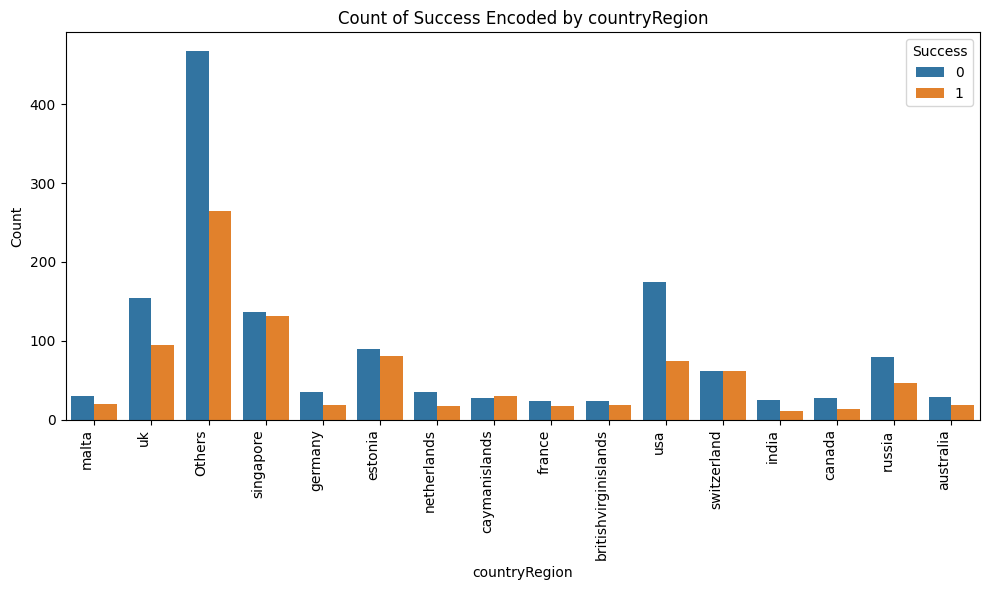

In [19]:
# Find platform values with counts less than 15
platform_counts = df['countryRegion'].value_counts()
other_platforms = platform_counts[platform_counts < 35].index.tolist()

# Replace these platform values with 'Others'
df.loc[df['countryRegion'].isin(other_platforms), 'countryRegion'] = 'Others'

# Plot the count of success_encoded by platform
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='countryRegion', hue='success_encoded')
plt.xlabel('countryRegion')
plt.ylabel('Count')
plt.title('Count of Success Encoded by countryRegion')
plt.legend(title='Success', labels=['0', '1'])
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [20]:
df

,ID,brandSlogan,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,minInvestment,distributedPercentage,success_encoded,num_months,coinNum_log_scaled
0,2,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,malta,20.0,1,1,Others,1,0.41,0,1,19.231611
1,3,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,uk,10.0,1,1,Others,1,0.40,0,11,22.332704
2,5,"Secure, Interference-Free Communications System",1,4.3,0.03,Others,14.0,1,1,ethereum,1,0.50,0,4,22.332704
3,6,Blockchain-based Bank Full Eco System WorldWide,1,4.7,0.10,uk,43.0,1,1,ethereum,1,0.50,0,4,20.030119
4,7,The First Blockchain Based Platform in Global,1,4.1,0.02,singapore,20.0,1,1,ethereum,1,0.25,1,1,21.639557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2738,Decentralised Global Index Trading Platform,0,1.3,0.05,Others,1.0,0,0,ethereum,0,0.70,0,4,20.366591
2346,2739,The best way to say thank you,0,1.3,1.00,russia,4.0,0,0,waves,0,0.50,0,1,17.370859
2347,2743,HorseCoin.,0,1.3,0.04,Others,6.0,1,1,ethereum,0,0.80,0,4,16.811243
2348,2747,A Cryptocurrency Value Chain,0,1.2,1.00,singapore,1.0,0,0,ethereum,0,0.30,0,0,16.811243


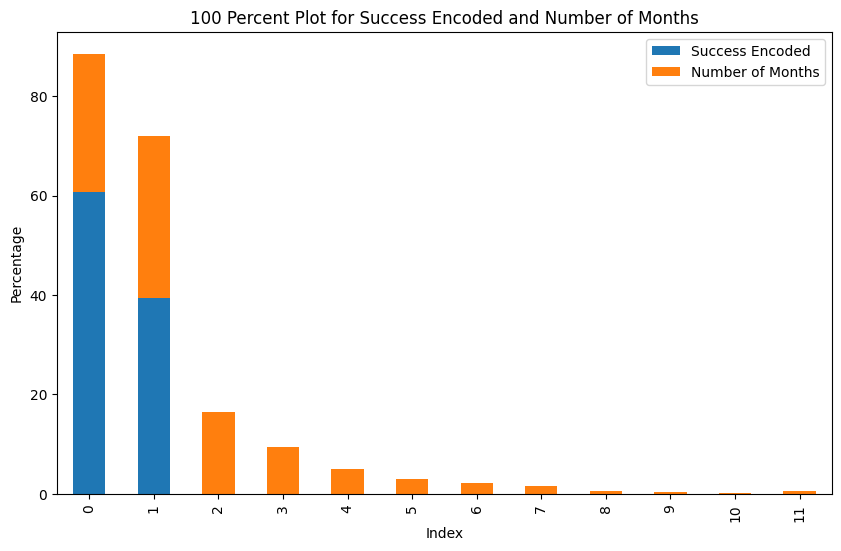

In [21]:
import matplotlib.pyplot as plt

# Calculate the proportions for success_encoded column
success_counts = df['success_encoded'].value_counts(normalize=True) * 100

# Calculate the proportions for num_months column
num_months_counts = df['num_months'].value_counts(normalize=True) * 100

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Success Encoded': success_counts, 'Number of Months': num_months_counts})

# Plot the 100 percent stacked bar plot
plot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Index')  # Set the x-label
plt.ylabel('Percentage')  # Set the y-label
plt.title('100 Percent Plot for Success Encoded and Number of Months')  # Set the title
plt.show()


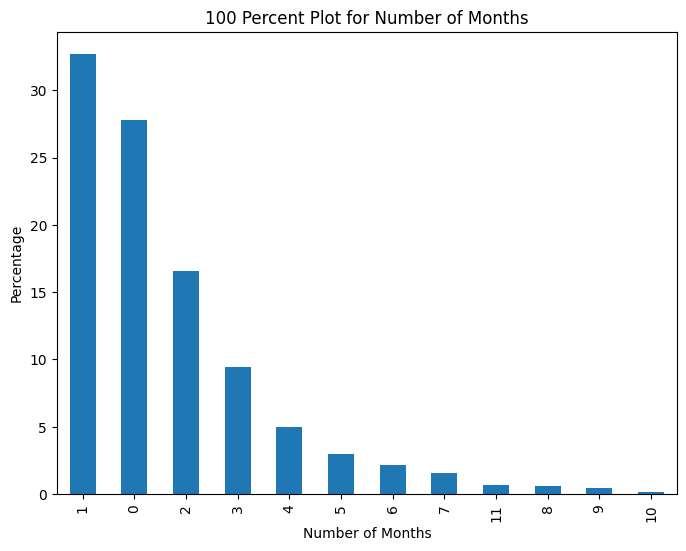

In [22]:
import matplotlib.pyplot as plt

# Calculate the proportions for num_months column
num_months_counts = df['num_months'].value_counts(normalize=True) * 100

# Plot the 100 percent stacked bar plot for num_months
num_months_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Number of Months')  # Set the x-label
plt.ylabel('Percentage')  # Set the y-label
plt.title('100 Percent Plot for Number of Months')  # Set the title
plt.show()


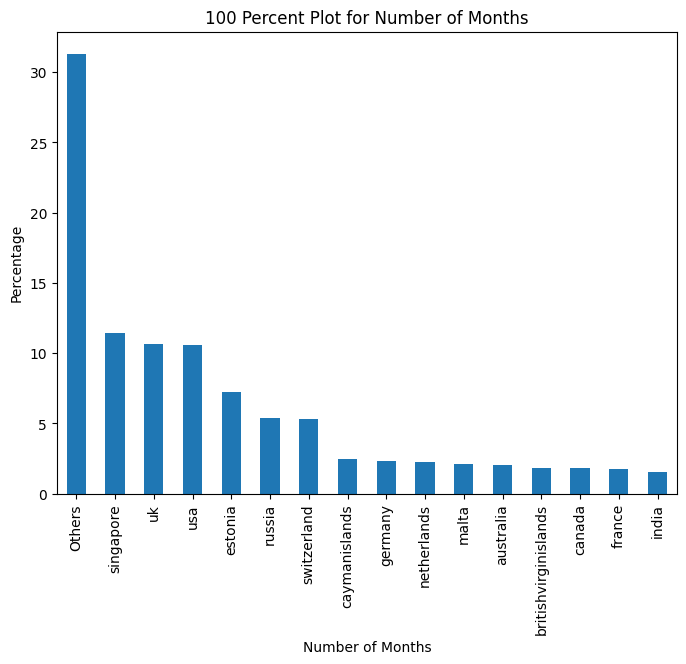

In [23]:
import matplotlib.pyplot as plt

# Calculate the proportions for num_months column
num_months_counts = df['countryRegion'].value_counts(normalize=True) * 100

# Plot the 100 percent stacked bar plot for num_months
num_months_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Number of Months')  # Set the x-label
plt.ylabel('Percentage')  # Set the y-label
plt.title('100 Percent Plot for Number of Months')  # Set the title
plt.show()

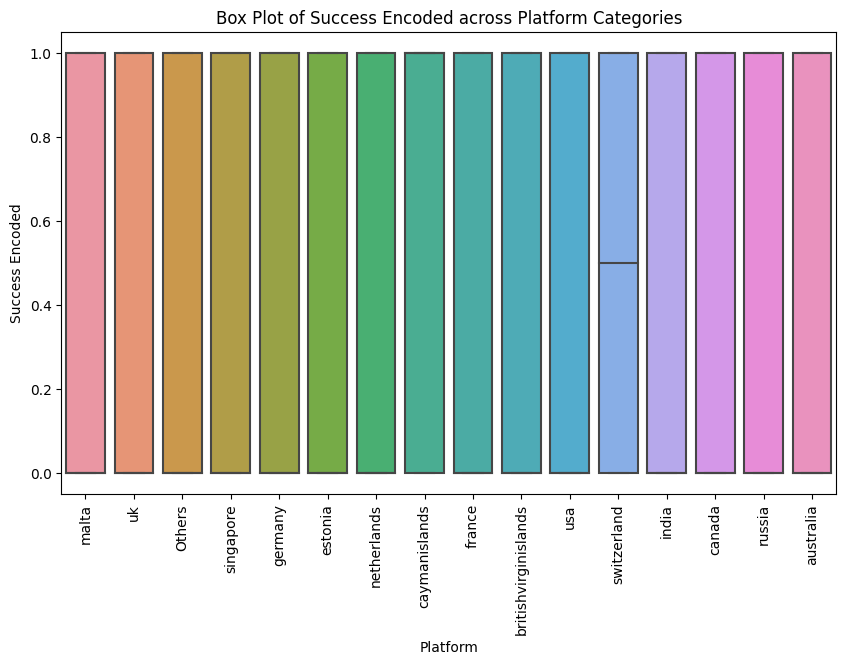

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='countryRegion', y='success_encoded', data=df)
plt.title('Box Plot of Success Encoded across Platform Categories')
plt.xlabel('Platform')
plt.ylabel('Success Encoded')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [25]:
df

,ID,brandSlogan,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,minInvestment,distributedPercentage,success_encoded,num_months,coinNum_log_scaled
0,2,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,malta,20.0,1,1,Others,1,0.41,0,1,19.231611
1,3,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,uk,10.0,1,1,Others,1,0.40,0,11,22.332704
2,5,"Secure, Interference-Free Communications System",1,4.3,0.03,Others,14.0,1,1,ethereum,1,0.50,0,4,22.332704
3,6,Blockchain-based Bank Full Eco System WorldWide,1,4.7,0.10,uk,43.0,1,1,ethereum,1,0.50,0,4,20.030119
4,7,The First Blockchain Based Platform in Global,1,4.1,0.02,singapore,20.0,1,1,ethereum,1,0.25,1,1,21.639557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2738,Decentralised Global Index Trading Platform,0,1.3,0.05,Others,1.0,0,0,ethereum,0,0.70,0,4,20.366591
2346,2739,The best way to say thank you,0,1.3,1.00,russia,4.0,0,0,waves,0,0.50,0,1,17.370859
2347,2743,HorseCoin.,0,1.3,0.04,Others,6.0,1,1,ethereum,0,0.80,0,4,16.811243
2348,2747,A Cryptocurrency Value Chain,0,1.2,1.00,singapore,1.0,0,0,ethereum,0,0.30,0,0,16.811243


In [26]:
df.drop(columns=['ID','brandSlogan'], inplace=True)


In [27]:
df

,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,minInvestment,distributedPercentage,success_encoded,num_months,coinNum_log_scaled
0,1,4.3,0.13,malta,20.0,1,1,Others,1,0.41,0,1,19.231611
1,1,4.4,0.01,uk,10.0,1,1,Others,1,0.40,0,11,22.332704
2,1,4.3,0.03,Others,14.0,1,1,ethereum,1,0.50,0,4,22.332704
3,1,4.7,0.10,uk,43.0,1,1,ethereum,1,0.50,0,4,20.030119
4,1,4.1,0.02,singapore,20.0,1,1,ethereum,1,0.25,1,1,21.639557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,0,1.3,0.05,Others,1.0,0,0,ethereum,0,0.70,0,4,20.366591
2346,0,1.3,1.00,russia,4.0,0,0,waves,0,0.50,0,1,17.370859
2347,0,1.3,0.04,Others,6.0,1,1,ethereum,0,0.80,0,4,16.811243
2348,0,1.2,1.00,singapore,1.0,0,0,ethereum,0,0.30,0,0,16.811243


In [28]:
# Perform one-hot encoding with drop_first=True
encoded_df = pd.get_dummies(df[['platform', 'countryRegion']], drop_first=True)

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original 'platform' and 'countryRegion' columns
df_encoded.drop(['platform', 'countryRegion'], axis=1, inplace=True)

In [29]:
df_encoded

,hasVideo,rating,priceUSD,teamSize,hasGithub,hasReddit,minInvestment,distributedPercentage,success_encoded,num_months,coinNum_log_scaled,platform_ethereum,platform_waves,countryRegion_australia,countryRegion_britishvirginislands,countryRegion_canada,countryRegion_caymanislands,countryRegion_estonia,countryRegion_france,countryRegion_germany,countryRegion_india,countryRegion_malta,countryRegion_netherlands,countryRegion_russia,countryRegion_singapore,countryRegion_switzerland,countryRegion_uk,countryRegion_usa
0,1,4.3,0.13,20.0,1,1,1,0.41,0,1,19.231611,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,4.4,0.01,10.0,1,1,1,0.40,0,11,22.332704,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,1,4.3,0.03,14.0,1,1,1,0.50,0,4,22.332704,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,4.7,0.10,43.0,1,1,1,0.50,0,4,20.030119,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1,4.1,0.02,20.0,1,1,1,0.25,1,1,21.639557,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,0,1.3,0.05,1.0,0,0,0,0.70,0,4,20.366591,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2346,0,1.3,1.00,4.0,0,0,0,0.50,0,1,17.370859,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2347,0,1.3,0.04,6.0,1,1,0,0.80,0,4,16.811243,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2348,0,1.2,1.00,1.0,0,0,0,0.30,0,0,16.811243,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# models

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df_cleaned' is your DataFrame

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['success_encoded'])  # Features
y = df_encoded['success_encoded']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=400, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)
# After fitting the RandomForestClassifier model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
print(importance_df.head(20))

                        Feature  Importance
3                      teamSize    0.146315
1                        rating    0.146169
9            coinNum_log_scaled    0.145607
7         distributedPercentage    0.125316
2                      priceUSD    0.123649
8                    num_months    0.074971
6                 minInvestment    0.026455
5                     hasReddit    0.022280
4                     hasGithub    0.022226
0                      hasVideo    0.019177
25             countryRegion_uk    0.016082
23      countryRegion_singapore    0.015464
10            platform_ethereum    0.014913
26            countryRegion_usa    0.014728
16        countryRegion_estonia    0.013834
24    countryRegion_switzerland    0.011089
22         countryRegion_russia    0.010247
15  countryRegion_caymanislands    0.007234
20          countryRegion_malta    0.006101
18        countryRegion_germany    0.006034


Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'max_depth': [None, 5, 10],
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define precision as the scoring metric
precision_scorer = make_scorer(precision_score)

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=precision_scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best precision score
best_params = grid_search.best_params_
best_precision = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Precision:", best_precision)

In [32]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)
from sklearn.metrics import precision_score

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

print("Precision:", precision)
from sklearn.metrics import confusion_matrix, f1_score

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.6071428571428571
Confusion Matrix:
[[258  33]
 [126  51]]
F1 Score: 0.39080459770114945
Accuracy: 0.6602564102564102


In [33]:
from xgboost import XGBClassifier
# Initialize the XGBClassifier
xgb_classifier = XGBClassifier()

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred = xgb_classifier.predict(X_test)
precision = precision_score(y_test, y_pred)

print("Precision:", precision)
from sklearn.metrics import confusion_matrix, f1_score

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.4678362573099415
Confusion Matrix:
[[200  91]
 [ 97  80]]
F1 Score: 0.4597701149425287
Accuracy: 0.5982905982905983


SVM


In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred = svm_classifier.predict(X_test)

precision = precision_score(y_test, y_pred)

print("Precision:", precision)
from sklearn.metrics import confusion_matrix, f1_score

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.5671641791044776
Confusion Matrix:
[[233  58]
 [101  76]]
F1 Score: 0.4887459807073955
Accuracy: 0.6602564102564102


In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=0.013)  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predictions on the test data
y_pred = svm_classifier.predict(X_test)

precision = precision_score(y_test, y_pred)

print("Precision:", precision)
from sklearn.metrics import confusion_matrix, f1_score

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Precision: 0.6288659793814433
Confusion Matrix:
[[255  36]
 [116  61]]
F1 Score: 0.4452554744525547
Accuracy: 0.6752136752136753


KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# Define the KNN classifier with initial parameters
knn_classifier = KNeighborsClassifier(n_neighbors=90, weights='uniform', algorithm='auto', leaf_size=600, p=2, n_jobs=None)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict the labels for test data
y_pred = knn_classifier.predict(X_test)

# Evaluate precision score
precision = precision_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

from sklearn.metrics import precision_score, f1_score, confusion_matrix

# Compute precision score
precision = precision_score(y_test, y_pred)

# Compute F1 score
f1 = f1_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision Score:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 0.655982905982906
Precision Score: 0.5597014925373134
F1 Score: 0.4823151125401929
Confusion Matrix:
[[232  59]
 [102  75]]


NEAURAL NETWORKS


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.1)


2024-05-05 13:03:04.162872: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 13:03:04.163072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 13:03:04.301031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7841 - precision: 0.4956 - val_loss: 0.6093 - val_precision: 0.5526
Epoch 2/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7181 - precision: 0.5424 - val_loss: 0.6378 - val_precision: 0.4756
Epoch 3/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6668 - precision: 0.5459 - val_loss: 0.6322 - val_precision: 0.4923
Epoch 4/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6466 - precision: 0.5473 - val_loss: 0.6278 - val_precision: 0.4912
Epoch 5/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6433 - precision: 0.5585 - val_loss: 0.6287 - val_precision: 0.5345
Epoch 6/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6319 - precision: 0.5361 - val_loss: 0.6123 - val_precision: 0.4857
Epoch 7/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6530 - precision: 0.5600 - val_loss: 0.6174 - val_precision: 0.5000
Epoch 8/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6333 - precision: 0.5812 - val_loss: 0.

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.55).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[267  24]
 [136  41]]
Precision: 0.6307692307692307
F1 Score: 0.3388429752066116
Accuracy: 0.6581196581196581


In [42]:
from tensorflow.keras.layers import Softmax

# Define the neural network model with Softmax activation in the output layer
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # Use Softmax activation for integer outputs
])

# Compile the model with appropriate loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=6, batch_size=4, validation_split=0.1)


Epoch 1/6


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5657 - loss: 0.6874 - val_accuracy: 0.6702 - val_loss: 0.6399
Epoch 2/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5990 - loss: 0.6612 - val_accuracy: 0.6755 - val_loss: 0.6304
Epoch 3/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6081 - loss: 0.6614 - val_accuracy: 0.6702 - val_loss: 0.6061
Epoch 4/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5956 - loss: 0.6574 - val_accuracy: 0.6968 - val_loss: 0.6007
Epoch 5/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6214 - loss: 0.6296 - val_accuracy: 0.7074 - val_loss: 0.6213
Epoch 6/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6176 - loss: 0.6403 - val_accuracy: 0.6915 - val_loss: 0.6063


In [43]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score

# Evaluate the model on the test data
y_pred = np.argmax(model.predict(X_test), axis=1)  # Get integer predictions
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)
# Print the confusion matrix, F1 score, and precision value
print("Confusion Matrix:")
print(conf_matrix)
print("F1 Score:", f1)
print("Precision:", precision)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.6538461538461539
Confusion Matrix:
[[219  72]
 [ 90  87]]
F1 Score: 0.6497664835164835
Precision: 0.6476319979708879


In [44]:
from tensorflow.keras.layers import Softmax

# Define the neural network model with Softmax activation in the output layer
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # Use Softmax activation for integer outputs
])

# Compile the model with appropriate loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=6, batch_size=4, validation_split=0.1)


Epoch 1/6


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5696 - loss: 0.6951 - val_accuracy: 0.6702 - val_loss: 0.6209
Epoch 2/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5995 - loss: 0.6500 - val_accuracy: 0.6968 - val_loss: 0.5964
Epoch 3/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6215 - loss: 0.6407 - val_accuracy: 0.6968 - val_loss: 0.6034
Epoch 4/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6486 - loss: 0.6373 - val_accuracy: 0.5372 - val_loss: 0.6709
Epoch 5/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6202 - loss: 0.6454 - val_accuracy: 0.6702 - val_loss: 0.6185
Epoch 6/6
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6200 - loss: 0.6593 - val_accuracy: 0.6809 - val_loss: 0.6178


In [45]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score

# Evaluate the model on the test data
y_pred = np.argmax(model.predict(X_test), axis=1)  # Get integer predictions
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)
# Print the confusion matrix, F1 score, and precision value
print("Confusion Matrix:")
print(conf_matrix)
print("F1 Score:", f1)
print("Precision:", precision)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.6752136752136753
Confusion Matrix:
[[258  33]
 [119  58]]
F1 Score: 0.6440093406757095
Precision: 0.6665792209558787


In [46]:
from tensorflow.keras.layers import Softmax

# Define the neural network model with Softmax activation in the output layer
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # Use Softmax activation for integer outputs
])

# Compile the model with appropriate loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.1)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6101 - loss: 0.6683 - val_accuracy: 0.6915 - val_loss: 0.6052
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6287 - loss: 0.6633 - val_accuracy: 0.6915 - val_loss: 0.6060
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6195 - loss: 0.6450 - val_accuracy: 0.6809 - val_loss: 0.6099
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6162 - loss: 0.6760 - val_accuracy: 0.6915 - val_loss: 0.5948
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 0.6417 - val_accuracy: 0.6915 - val_loss: 0.5880
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 0.6647 - val_accuracy: 0.6809 - val_loss: 0.6157
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6140 - loss: 0.6462 - val_accuracy: 0.6915 - val_loss: 0.5913
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6335 - loss: 0.6414 - val_accuracy: 0.6809 - val_

In [47]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score

# Evaluate the model on the test data
y_pred = np.argmax(model.predict(X_test), axis=1)  # Get integer predictions
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)
# Print the confusion matrix, F1 score, and precision value
print("Confusion Matrix:")
print(conf_matrix)
print("F1 Score:", f1)
print("Precision:", precision)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.6709401709401709
Confusion Matrix:
[[263  28]
 [126  51]]
F1 Score: 0.6316677271870287
Precision: 0.6645486183249354


KNN

In [39]:
y_pred=0

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, accuracy_score, confusion_matrix

def train_logistic_regression(X_train, y_train, X_test, y_test, penalty='l1', C=10.0, solver='lbfgs', max_iter=10):
    # Initialize the Logistic Regression model
    logistic_model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=max_iter)
    
    # Train the model
    logistic_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = logistic_model.predict(X_test)
    print(y_pred)
    # Compute precision score
    precision = precision_score(y_test, y_pred)
    
    # Compute F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return precision, f1, accuracy, conf_matrix

# Example usage:
precision, f1, accuracy, conf_matrix = train_logistic_regression(X_train, y_train, X_test, y_test, penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
print("Precision Score:", precision)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


[1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1]
Precision Score: 0.54
F1 Score: 0.4954128440366973

In [41]:
y_pred

0